In [1]:
from pyfile import *
import warnings
warnings.filterwarnings("ignore")
sns.set(style="white", palette="muted", color_codes=False)
%matplotlib inline

In [2]:
train = pd.read_csv('./housing.csv')
# test = pd.read_csv('./housing.csv')

train.columns = [x.lower().replace(' ','_') for x in train.columns]
# train.dropna(axis = 'columns', how = 'all', inplace = True)

In [3]:
#Dropping row with unknown variable.
train.drop([1379], inplace = True)

In [4]:
quantitative = train.select_dtypes(include = [np.number])
quantitative = quantitative.drop('id', axis = 1)
qualitative = train.select_dtypes(include = [np.object])

Kurtosis: 6.502799105301849
Skewness: 1.880007613681095


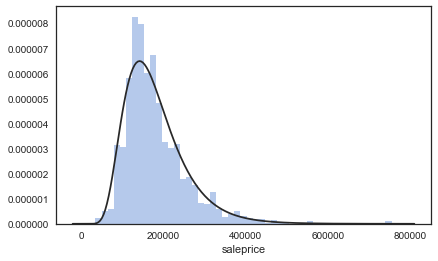

In [5]:
y = quantitative.saleprice
sns.distplot(y, kde = False, fit = st.lognorm)
print('Kurtosis: {}'.format(kurtosis(y)))
print('Skewness: {}'.format(skew(y)))

Kurtosis: 0.8000427774841801
Skewness: 0.12120453554324111


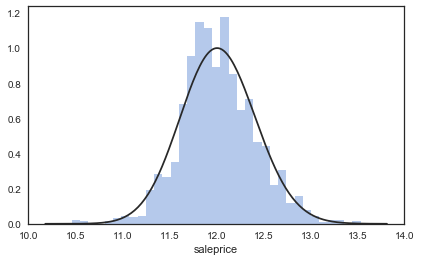

In [6]:
y = np.log1p(quantitative.saleprice)
sns.distplot(y, kde = False, fit = st.lognorm)
print('Kurtosis: {}'.format(kurtosis(y)))
print('Skewness: {}'.format(skew(y)))

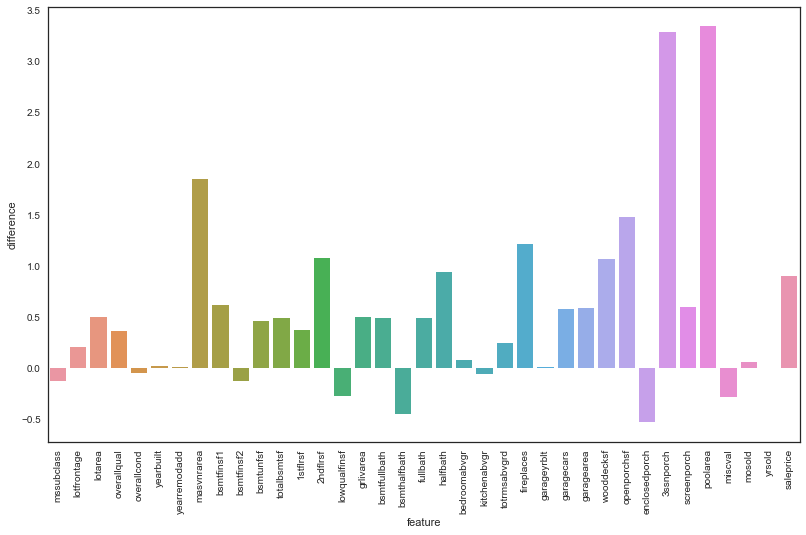

In [7]:
features = quantitative.columns

standard = train[train['saleprice'] < 180000]
pricey = train[train['saleprice'] >= 180000]

diff = pd.DataFrame()
diff['feature'] = features
diff['difference'] = [(pricey[i].mean() - standard[i].mean())/(standard[i].mean()) for i in features]

plt.figure(figsize = (12,8))
x = plt.xticks(rotation = 90)
sns.barplot(data = diff, x ='feature', y = 'difference')

In [8]:
#Returns a tuple list:(feature, feature missing %) 
def missing(columns, train):
    mlist = []
    for i in columns:
        x = str((100 - (train[i].value_counts().sum()/train.shape[0]) * 100))
        if x != '0.0':
            a = str(i)
            b = x[:4]
            c = (a,b)
            mlist.append(c)
        else:
            pass
    return mlist.sort(key = lambda tup: tup[1], reverse = True), mlist   

In [9]:
missing(train.columns, train)[1][:5]

[('poolqc', '99.5'),
 ('miscfeature', '96.2'),
 ('alley', '93.7'),
 ('fence', '80.7'),
 ('garagetype', '5.55')]

In [10]:
for i in train:
    if train[i].isnull().sum() != 0:
        train[i].fillna('None', inplace = True)
    else:
        pass

In [11]:
qualitative.drop(['poolqc','miscfeature','alley','fence'], axis = 1, inplace = True)

In [12]:
#Pairwise correlation - numerical data against target
corrlist = []
for var in quantitative.columns:
    a = abs(y.corr(quantitative[var]))
    b = var
    c = (b,str(a)[:4])
    corrlist.append(c)
    
corrlist.sort(key=lambda tup: tup[1], reverse=True)
corrlist[:10]

[('saleprice', '0.94'),
 ('overallqual', '0.81'),
 ('grlivarea', '0.70'),
 ('garagecars', '0.68'),
 ('garagearea', '0.65'),
 ('totalbsmtsf', '0.61'),
 ('1stflrsf', '0.59'),
 ('fullbath', '0.59'),
 ('yearbuilt', '0.58'),
 ('yearremodadd', '0.56')]

In [13]:
qualitative.bsmtqual.replace(np.NaN, 'None', inplace=True)
qualitative.bsmtcond.replace(np.NaN, 'None', inplace=True)
qualitative.bsmtexposure.replace(np.NaN, 'None', inplace=True)
qualitative.bsmtfintype1.replace(np.NaN, 'None', inplace=True)
qualitative.bsmtfintype2.replace(np.NaN, 'None', inplace=True)
qualitative.masvnrtype.replace(np.NaN, 'None', inplace=True)
qualitative.garagetype.replace(np.NaN, 'None', inplace=True)
qualitative.garagefinish.replace(np.NaN, 'None', inplace=True)
qualitative.garagequal.replace(np.NaN, 'None', inplace=True)
qualitative.garagecond.replace(np.NaN, 'None', inplace=True)
qualitative.fireplacequ.replace(np.NaN, 'None', inplace=True)
quantitative.garageyrblt.replace(np.NaN, 0, inplace=True)
quantitative.lotfrontage.replace(np.NaN, 0, inplace=True)
quantitative.masvnrarea.replace(np.NaN, 0, inplace=True)

In [14]:
count = 0
types = 0
typse = 0
s = []

#Sum of value counts in each category
for i in qualitative.columns:
    s.append(((len(qualitative[i].value_counts().unique()) - 1), qualitative.columns[count]))
    count += 1
    types += (len(qualitative[i].value_counts().unique()) - 1)
    typse += len(qualitative[i].value_counts().unique())
print('total dummies: ' + str(types) + '\ntotal unique: ' + str(typse) + '\ncount: ' + str(count))

total dummies: 194
total unique: 233
count: 39


In [15]:
def listmaker(elem):
    return elem[0]
# s.sort(key = listmaker, reverse = True)
# print('Sorted list:\n', s)

In [16]:
count1, count2, count3, count4, count5, count6 = (0 for i in range(6))
list1, list2, list3, list4, list5, list6 = ([] for i in range(6))

# dividing dummies into seperate list
for i in s:
    if count1 <= 30:
        count1 += i[0]
        list1.append(i[1])
    elif count2 <= 30:
        count2 += i[0]
        list2.append(i[1])
    elif count3 <= 30:
        count3 += i[0]
        list3.append(i[1])
    elif count4 <= 30:
        count4 += i[0]
        list4.append(i[1])
    elif count5 <= 30:
        count5 += i[0]
        list5.append(i[1])
    else:
        count6 += i[0]
        list6.append(i[1])

print(f'list: {list1}\ncount: {count1}\n')
print(f'list: {list2}\ncount: {count2}\n')
print(f'list: {list3}\ncount: {count3}\n')
print(f'list: {list4}\ncount: {count4}\n')
print(f'list: {list5}\ncount: {count5}\n')
print(f'list: {list6}\ncount: {count6}\n')

list: ['mszoning', 'street', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood']
count: 39

list: ['condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle', 'roofmatl']
count: 31

list: ['exterior1st', 'exterior2nd', 'masvnrtype', 'exterqual']
count: 31

list: ['extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2']
count: 33

list: ['heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual', 'functional', 'fireplacequ', 'garagetype']
count: 34

list: ['garagefinish', 'garagequal', 'garagecond', 'paveddrive', 'saletype', 'salecondition']
count: 26



In [17]:
hm1 = pd.get_dummies(qualitative[list1], columns = list1, drop_first = True) 
hm2 = pd.get_dummies(qualitative[list2], columns = list2, drop_first = True)
hm3 = pd.get_dummies(qualitative[list3], columns = list3, drop_first = True)
hm4 = pd.get_dummies(qualitative[list4], columns = list4, drop_first = True)
hm5 = pd.get_dummies(qualitative[list5], columns = list5, drop_first = True)
hm6 = pd.get_dummies(qualitative[list6], columns = list6, drop_first = True)

hm1['saleprice'] = quantitative.saleprice
hm2['saleprice'] = quantitative.saleprice
hm3['saleprice'] = quantitative.saleprice
hm4['saleprice'] = quantitative.saleprice
hm5['saleprice'] = quantitative.saleprice
hm6['saleprice'] = quantitative.saleprice

In [18]:
def heatmap(hm):
    corr = hm.corr()

    fig, ax = plt.subplots(figsize = (18,14))

    mask = np.zeros_like(corr, dtype = np.bool)
    mask[np.triu_indices_from(mask)] = True

    ax = sns.heatmap(corr, mask = mask, ax = ax, center = 0, annot = True, fmt = '.1f')

    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize = 14)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize = 14)

    plt.show()

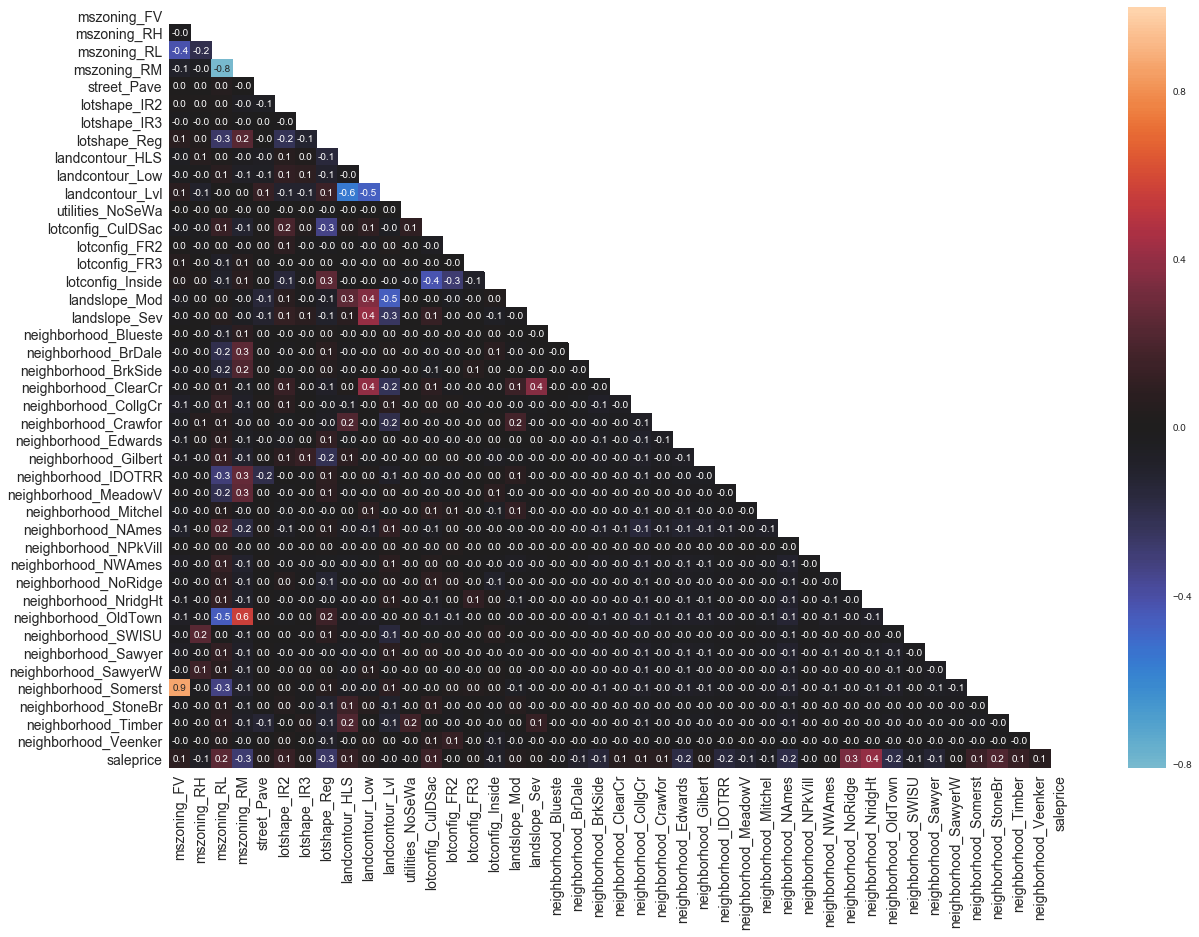

In [19]:
heatmap(hm1)

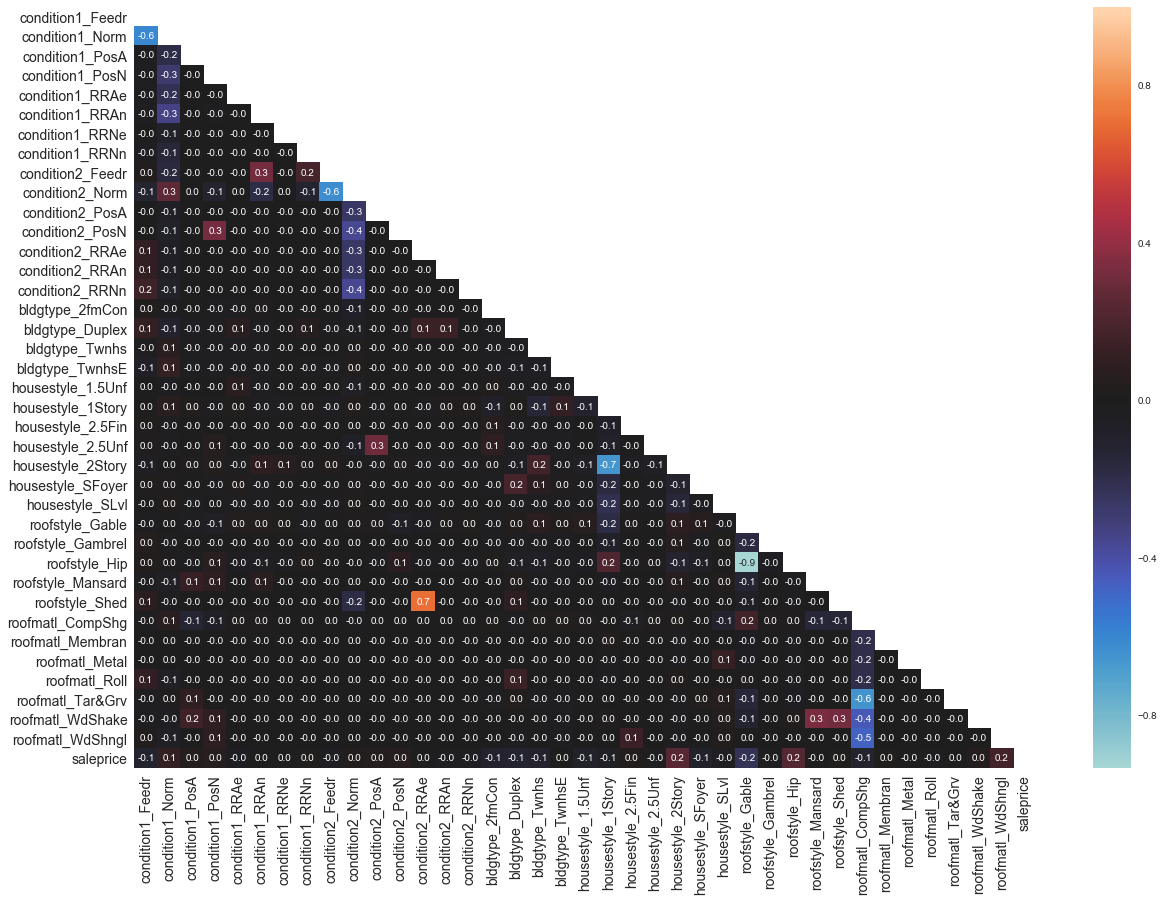

In [20]:
heatmap(hm2)

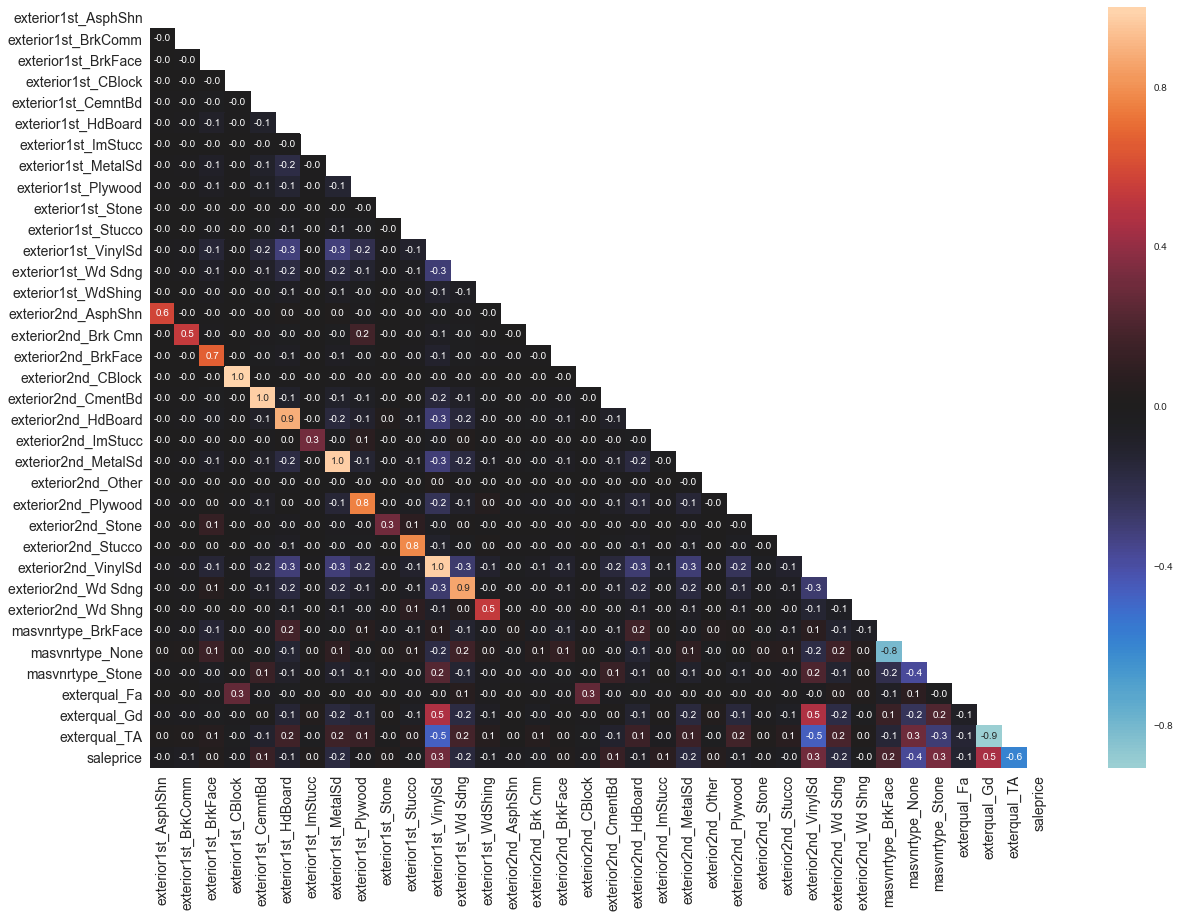

In [21]:
heatmap(hm3)

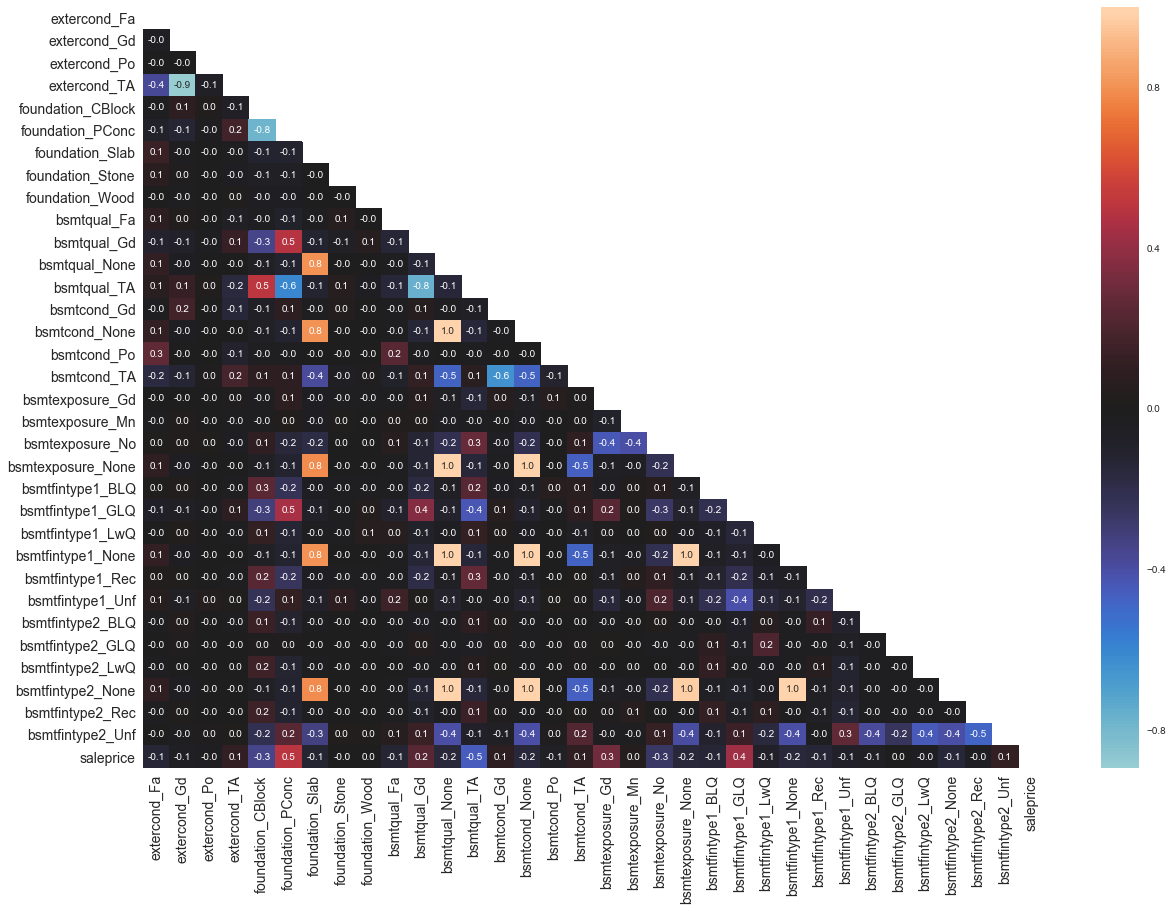

In [22]:
heatmap(hm4)

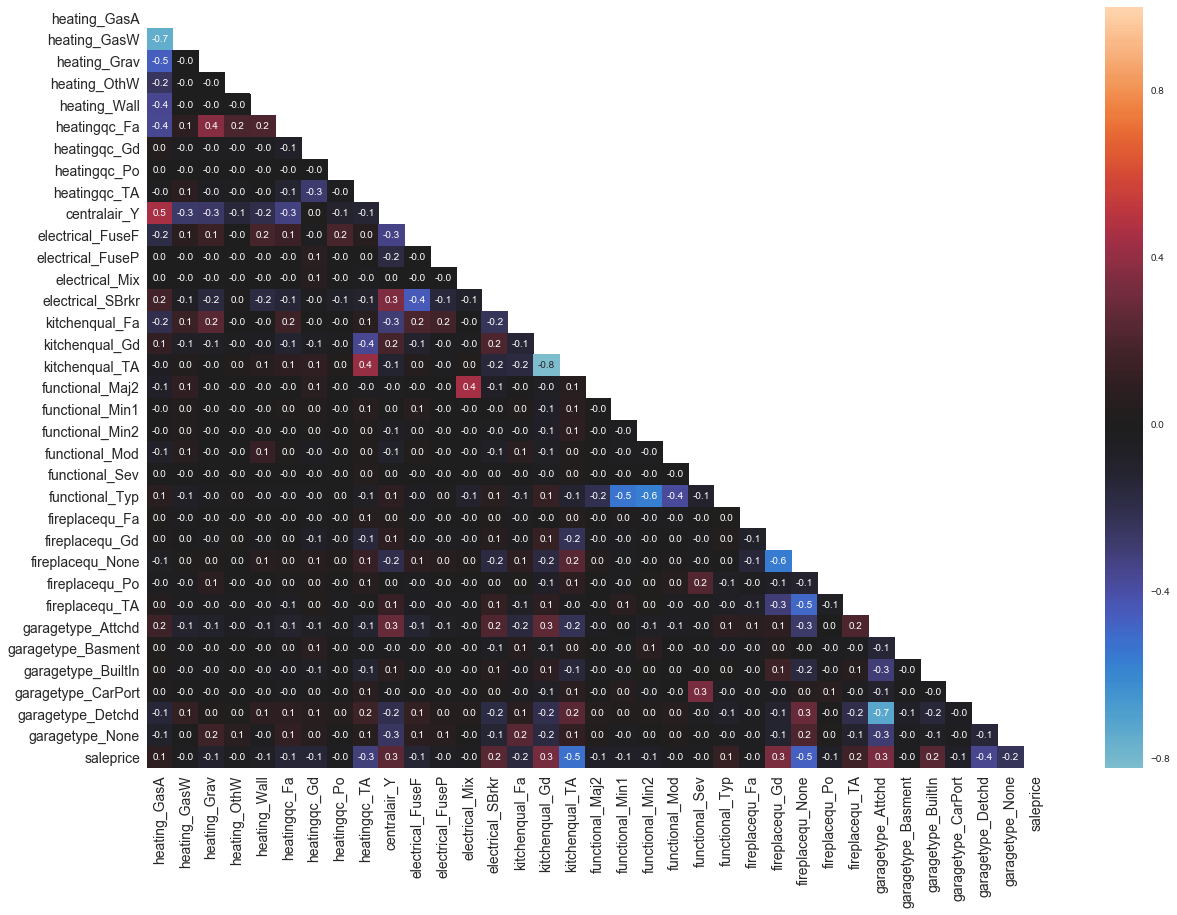

In [23]:
heatmap(hm5)

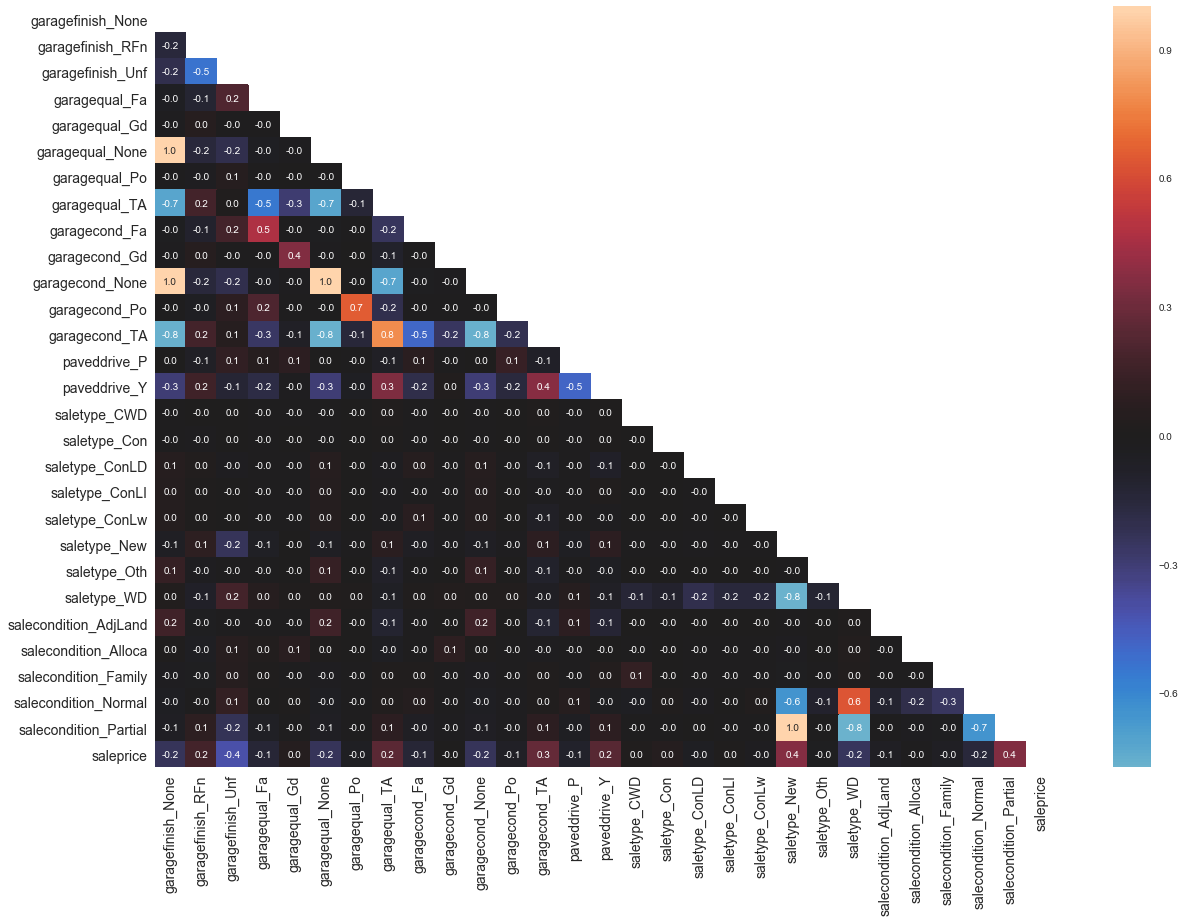

In [24]:
heatmap(hm6)

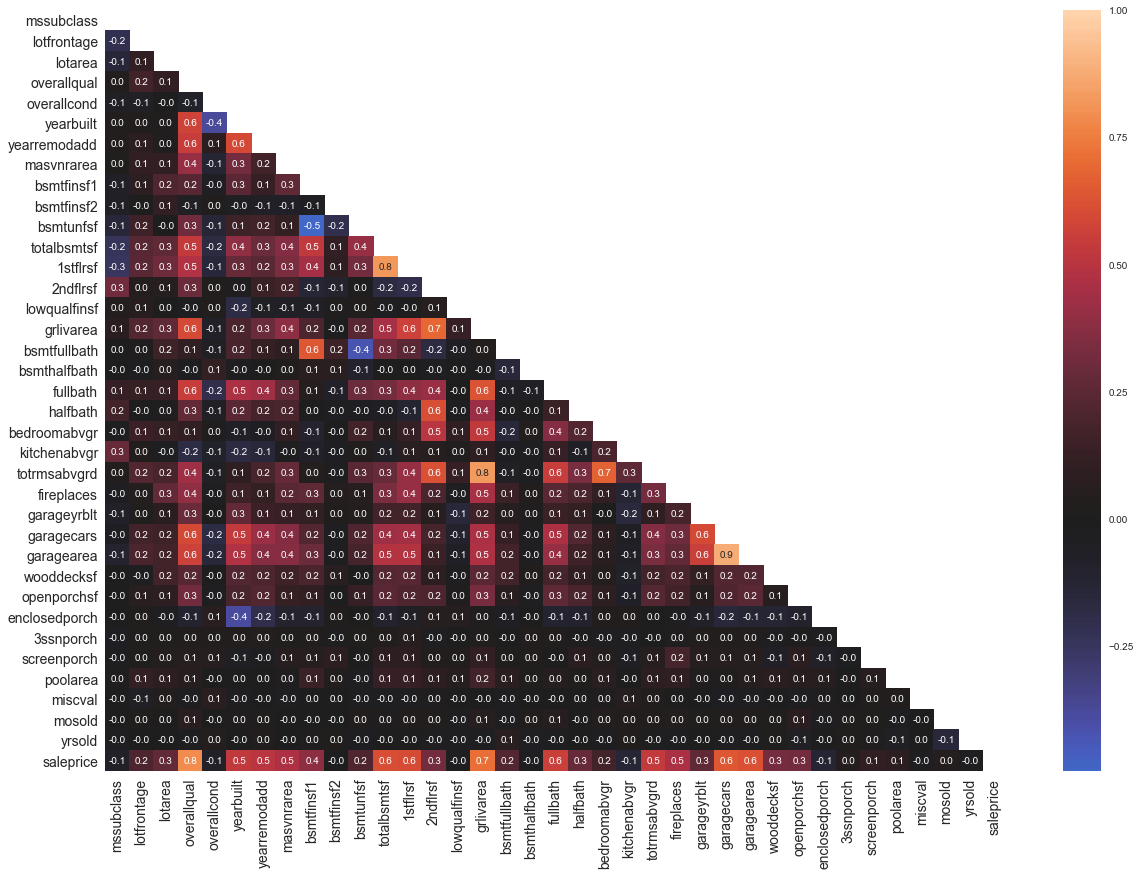

In [25]:
heatmap(quantitative)

In [26]:
s.sort(key = listmaker, reverse = True)
print('Sorted list:\n', s)

Sorted list:
 [(21, 'neighborhood'), (14, 'exterior2nd'), (11, 'exterior1st'), (8, 'condition1'), (7, 'housestyle'), (7, 'saletype'), (6, 'bsmtfintype1'), (6, 'bsmtfintype2'), (6, 'functional'), (6, 'garagetype'), (5, 'roofstyle'), (5, 'foundation'), (5, 'heating'), (5, 'fireplacequ'), (5, 'garagecond'), (5, 'salecondition'), (4, 'mszoning'), (4, 'lotconfig'), (4, 'bldgtype'), (4, 'roofmatl'), (4, 'extercond'), (4, 'bsmtqual'), (4, 'bsmtcond'), (4, 'bsmtexposure'), (4, 'heatingqc'), (4, 'electrical'), (4, 'garagequal'), (3, 'lotshape'), (3, 'landcontour'), (3, 'condition2'), (3, 'masvnrtype'), (3, 'exterqual'), (3, 'kitchenqual'), (3, 'garagefinish'), (2, 'landslope'), (2, 'paveddrive'), (1, 'street'), (1, 'utilities'), (1, 'centralair')]


In [27]:
qualitative_features = ['neighborhood', 'exterior1st', 'bsmtfintype1', 'garagetype', 'foundation', 'salecondition', 'mszoning']
quantitative_features = ['lotfrontage', 'lotarea', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'totalbsmtsf', '1stflrsf', '2ndflrsf', 'grlivarea', 'totrmsabvgrd', 'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf', 'openporchsf'].copy()

In [28]:
# qualitative_features = ['neighborhood', 'exterior1st', 'bsmtfintype1', 'garagetype', 'foundation', 'salecondition', 'mszoning', 'bsmtqual', 'masvnrtype', 'exterqual', 'kitchenqual']
# quantitative_features = ['lotfrontage', 'lotarea', 'overallqual', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1', 'totalbsmtsf', '1stflrsf', '2ndflrsf', 'grlivarea', 'fullbath', 'halfbath', 'totrmsabvgrd', 'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf', 'openporchsf'].copy()

In [29]:
quantitative.columns

Index(['mssubclass', 'lotfrontage', 'lotarea', 'overallqual', 'overallcond',
       'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2',
       'bsmtunfsf', 'totalbsmtsf', '1stflrsf', '2ndflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd', 'fireplaces',
       'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf', 'openporchsf',
       'enclosedporch', '3ssnporch', 'screenporch', 'poolarea', 'miscval',
       'mosold', 'yrsold', 'saleprice'],
      dtype='object')

In [30]:
from sklearn.preprocessing import LabelEncoder


qualitativele = qualitative[qualitative_features]
le = LabelEncoder()
for i in qualitative_features:
    try:
        qualitativele[i] = le.fit_transform(qualitativele[i])
    except:
        pass

In [31]:
from sklearn.preprocessing import OneHotEncoder

X_qual = qualitativele[qualitative_features]
# X_qual['saleprice'] = quantitative.saleprice
ohe = OneHotEncoder(categorical_features=[0])
X_qual = ohe.fit_transform(X_qual).toarray()
X_qual = pd.DataFrame(X_qual)
# X_qual = X_qual.drop(38, axis = 1, inplace = True)

In [32]:
# Obtaining dummies from qualitative data
qualitative = pd.get_dummies(qualitative[qualitative_features], columns = qualitative_features, drop_first = True)
qualitative.shape

(1459, 64)

In [33]:
quantitative.lotfrontage = quantitative.lotfrontage.astype('int64')
quantitative.masvnrarea = quantitative.masvnrarea.astype('int64')
quantitative.garageyrblt = quantitative.garageyrblt.astype('int64')

In [34]:
# def log_transform(feature):
#     quantitative[feature] = np.log1p(quantitative[feature].values)
    
# for i in quantitative_features:
#     log_transform(i)

In [35]:
# Maybe next time...
# X_train = quantitative[quantitative_features].copy()
# X_train = pd.concat([X_train, X_qual], axis = 1)

In [36]:
X_train = quantitative[quantitative_features].copy()
X_train = pd.concat([X_train, qualitative], axis = 1)
X_train['saleprice'] = quantitative.saleprice
X_train['yrsold'] = quantitative.yrsold

In [37]:
import copy
count = 0

# X_train = pd.concat([quantitative, qualitativele], axis = 1)

ys = (X_train[X_train.yrsold >= 2010].index)
X_test = []
for i in ys:
    X_test.append(X_train.loc[i])
    X_train = X_train.drop(i, axis = 0)
    
y_train = X_train.saleprice
X_train.drop('saleprice', axis = 1, inplace = True)   
X_test = pd.DataFrame(X_test)
y_test = X_test.saleprice
X_test.drop('saleprice', axis = 1, inplace = True)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

X_train = copy.deepcopy(X_train)
y_train = copy.deepcopy(y_train)
X_test = copy.deepcopy(X_test)
y_test = copy.deepcopy(y_test)

In [38]:
X_train.shape

(1284, 81)

In [39]:
nc = [i for i in quantitative_features if i != 'saleprice']
X_train.ix[:, nc] = (X_train.ix[:, nc] - X_train.ix[:, nc].mean()) / X_train.ix[:, nc].std()
X_test.ix[:, nc] = (X_test.ix[:, nc] - X_test.ix[:, nc].mean()) / X_test.ix[:, nc].std()
X_train.drop('yrsold', axis = 1, inplace = True)
X_test.drop('yrsold', axis = 1, inplace = True)

In [40]:
# y_train = y_train.fillna(0)
# X_train = X_train.fillna(0)

In [41]:
def error(actual, predicted):
    actual = np.log(actual)
    predicted = np.log(predicted)
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))

In [42]:
features = X_train.columns
lasso = linear_model.LassoLarsCV(max_iter=10000)

Xtrain = X_train[features].fillna(0).values
ytrain = y_train.values
lasso.fit(Xtrain, np.log(ytrain))

ypred = np.exp(lasso.predict(Xtrain))
error(ytrain, ypred)

0.14747563830413407

In [43]:
features = X_test.columns
lasso = linear_model.LassoLarsCV(max_iter = 10000)

Xtest = X_test[features].fillna(0.).values
ytest = y_test.values
lasso.fit(Xtest, np.log(ytest))

ypred = np.exp(lasso.predict(Xtest))
error(ytest, ypred)

0.10509698884293482

In [44]:
alphas = 10**np.linspace(5,-2,100)*0.5
lasso = Lasso(max_iter = 100000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(Xtrain, ytrain)
    lasso.score(Xtest, ytest)
    coefs.append(lasso.coef_)
    
np.shape(coefs)

(100, 80)

Text(0,0.5,'weights')

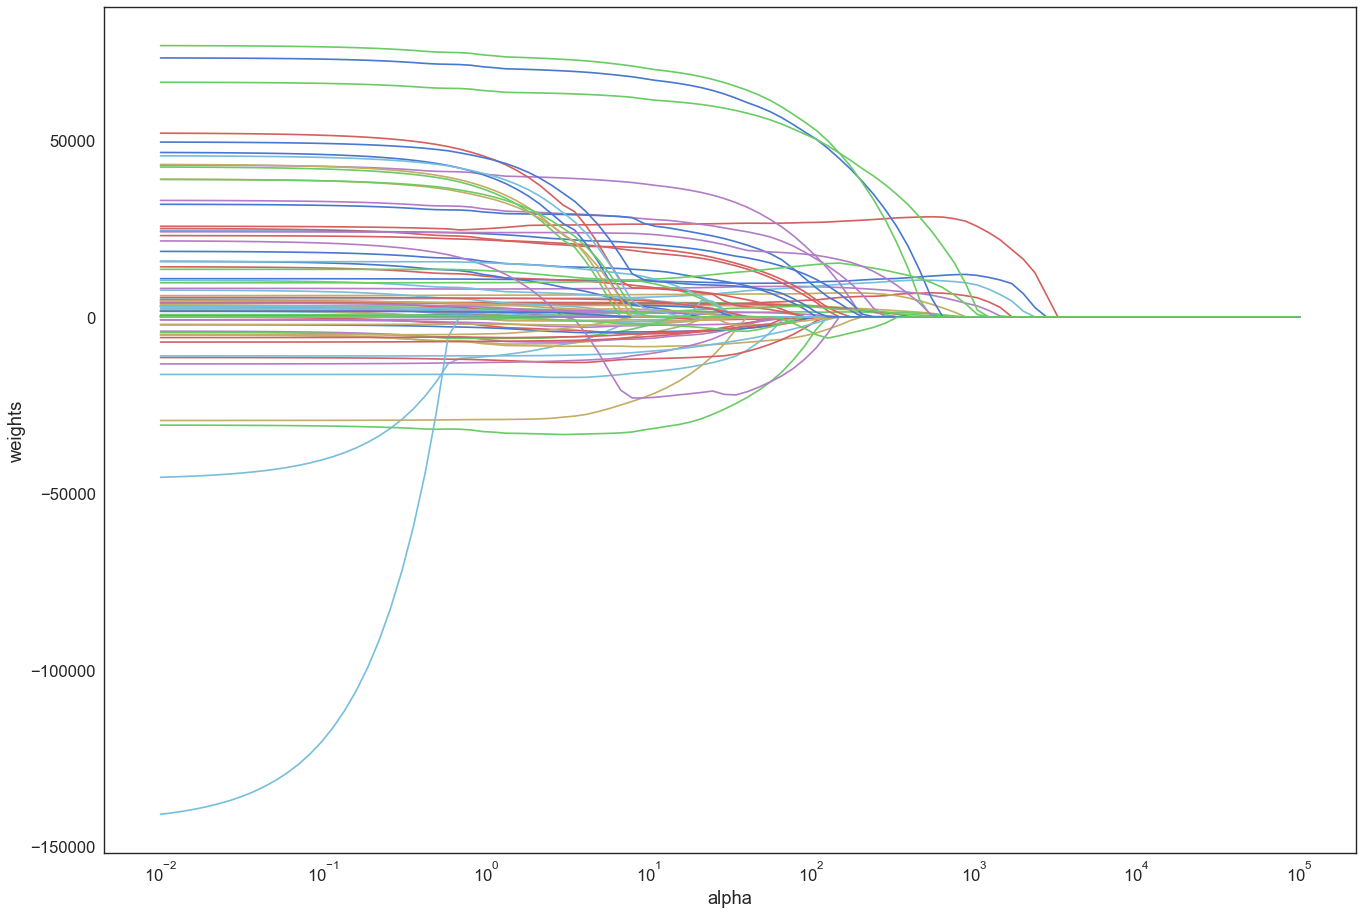

In [45]:
from matplotlib.pyplot import figure
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})
figure(num=None, figsize=(18, 14), dpi=80, facecolor='w', edgecolor='k')

ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [46]:
e = pd.Series(lasso.coef_, index = X_train.columns)
e = e[e > 0]

In [47]:
def tupler(e):
    count = 0
    for i in e:
        i = "{0:.0f}".format(i)
        j = e.index[count]
        k = (j ,int(i))
        slist.append(k)
        count += 1

In [48]:
slist = []
tupler(e)
slist.sort(key = lambda tup: tup[1], reverse = True)
print(f'Features: {len(slist)} wowee thaT\'s a lot oH man')

Features: 59 wowee thaT's a lot oH man


In [49]:
snist=[]
for i in slist:
    snist.append(i[0])
snist[:5]

['neighborhood_StoneBr',
 'neighborhood_NoRidge',
 'neighborhood_NridgHt',
 'garagetype_BuiltIn',
 'mszoning_RL']

In [50]:
X_train = X_train.fillna(0)

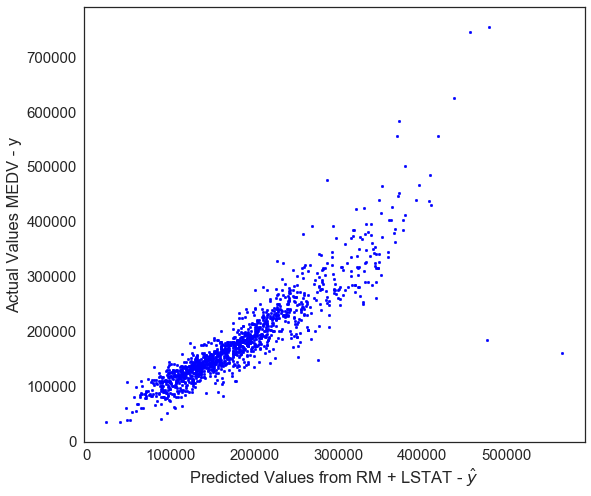

R^2 of the prediction:  0.8191
Mean Square Error: 1138536014.24


In [51]:
lm = linear_model.LinearRegression()

X = X_train[snist]
y = y_train 

model = lm.fit(X, y)

predictions  =  model.predict(X)
score        =  model.score(X, y)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='b', marker='.', zorder=10)
plt.xlabel("Predicted Values from RM + LSTAT - $\hat{y}$")
plt.ylabel("Actual Values MEDV - y")
plt.show()

mse = mean_squared_error(y, model.predict(X))
print("R^2 of the prediction:  %.4f" % score)
print("Mean Square Error: %.2f" % mse)

In [52]:
features = X_train.columns
lasso = linear_model.LassoLarsCV(max_iter=10000)

Xtrain = X_train[snist].fillna(0.).values
ytrain = y_train.values
lasso.fit(Xtrain, np.log(ytrain))

ypred = np.exp(lasso.predict(Xtrain))
error(ytrain, ypred)

0.15099122361254397

In [53]:
X_test = X_test.fillna(0)

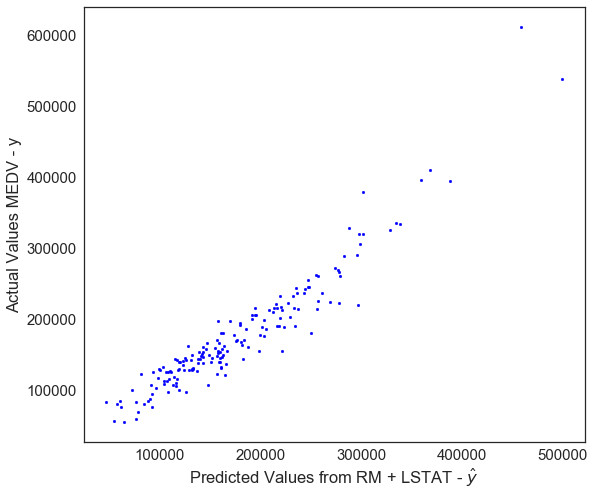

R^2 of the prediction:  0.9040
Mean Square Error: 617997352.05


In [54]:
lm = linear_model.LinearRegression()

X = X_test[snist]
y = y_test 

model = lm.fit(X, y)

predictions  =  model.predict(X)
score        =  model.score(X, y)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='b', marker='.', zorder=10)
plt.xlabel("Predicted Values from RM + LSTAT - $\hat{y}$")
plt.ylabel("Actual Values MEDV - y")
plt.show()

mse = mean_squared_error(y, model.predict(X))
print("R^2 of the prediction:  %.4f" % score)
print("Mean Square Error: %.2f" % mse)

In [55]:
features = X_test.columns
lasso = linear_model.LassoLarsCV(max_iter = 10000)

Xtest = X_test[snist].fillna(0.).values
ytest = y_test.values
lasso.fit(Xtest, np.log(ytest))

ypred = np.exp(lasso.predict(Xtest))
error(ytest, ypred)

0.11394421111710823

In [56]:
def ridge_coefs(X, y, alphas):   
    coefs = []    
    ridge_reg = Ridge()    
    for a in alphas:       
        ridge_reg.set_params(alpha=a)                
        ridge_reg.fit(X, y)       
        coefs.append(ridge_reg.coef_)        
    return coefs

In [57]:
# np.logspace gives us points between specified orders of magnitude on a logarithmic scale. It is base 10.
r_alphas = np.logspace(-2, 5, 200)

# Get the coefficients for each alpha for the Ridge, using the function above
r_coefs = ridge_coefs(X_train, y_train, r_alphas)

In [58]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 80)

Text(0,0.5,'weights')

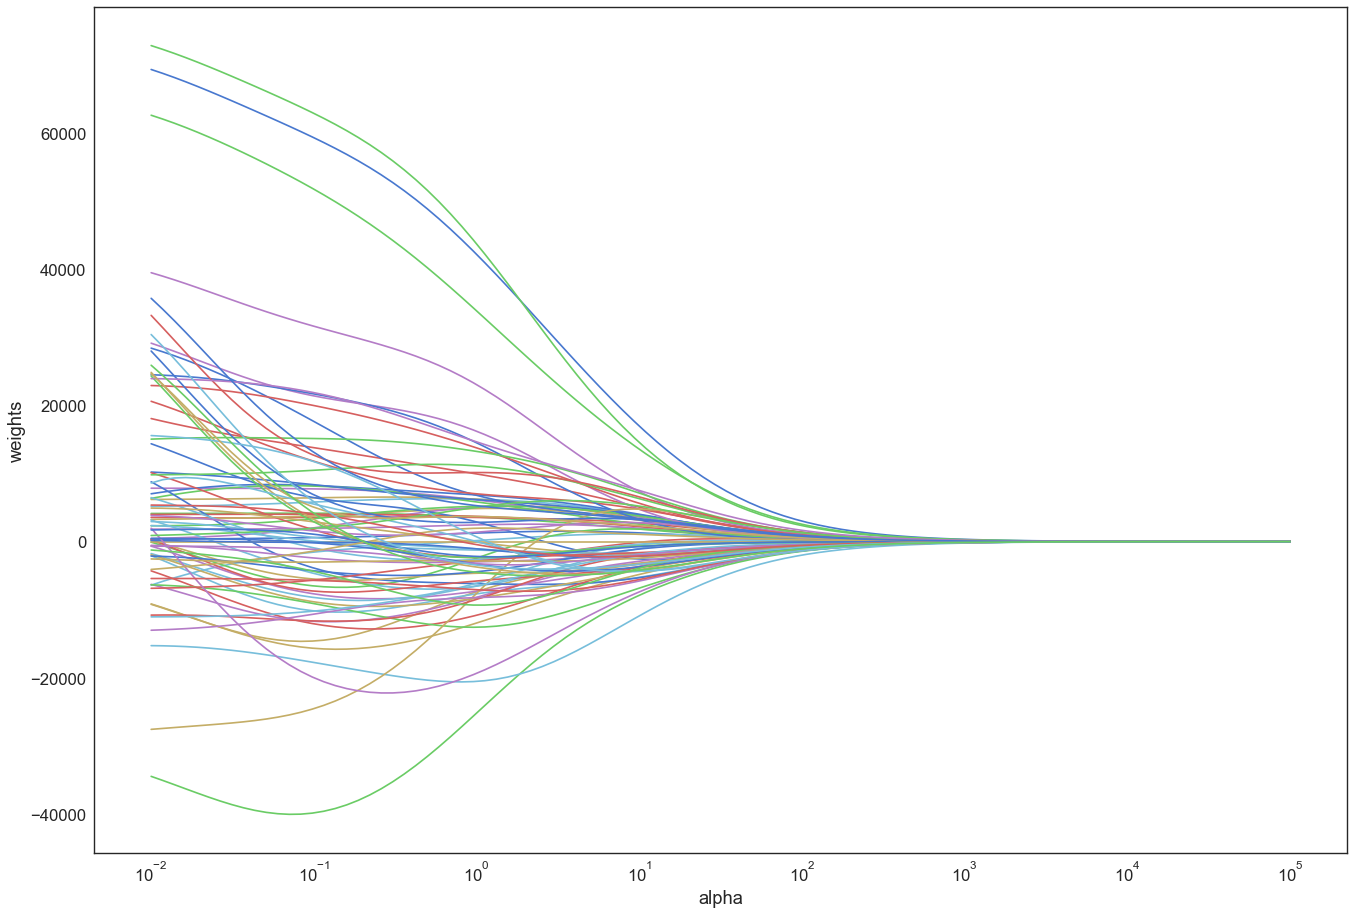

In [59]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})
figure(num=None, figsize=(18, 14), dpi=80, facecolor='w', edgecolor='k')

ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [60]:
# ridge.fit(X, y)
f = pd.Series(ridge.coef_, index = X_train.columns)
f = f[f > 0]

In [61]:
def tupler(e):
    count=0
    for i in e:
        i="{0:.0f}".format(i)
        j=e.index[count]
        k=(j,int(i))
        slist.append(k)
        count+=1

In [62]:
slist=[]
tupler(f)
slist.sort(key=lambda tup: tup[1], reverse=True)
print(f'Features: {len(slist)}')

Features: 54


In [63]:
snist=[]
for i in slist:
    snist.append(i[0])
snist[:5]

['neighborhood_StoneBr',
 'neighborhood_NoRidge',
 'neighborhood_NridgHt',
 'neighborhood_Veenker',
 'mszoning_RL']

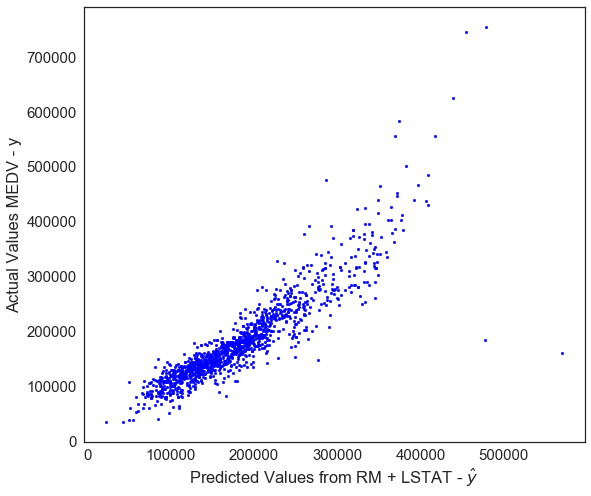

R^2 of the prediction:  0.8198
Mean Square Error: 1134110342.56


In [64]:
lm = linear_model.LinearRegression()

X = X_train[snist]
y = y_train 

model = lm.fit(X, y)

predictions  =  model.predict(X)
score        =  model.score(X, y)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='b', marker='.', zorder=10)
plt.xlabel("Predicted Values from RM + LSTAT - $\hat{y}$")
plt.ylabel("Actual Values MEDV - y")
plt.show()

mse = mean_squared_error(y, model.predict(X))
print("R^2 of the prediction:  %.4f" % score)
print("Mean Square Error: %.2f" % mse)

In [65]:
features = X_train.columns
lasso = linear_model.LassoLarsCV(max_iter=10000)

Xtrain = X_train[snist].fillna(0.).values
ytrain = y_train.values
lasso.fit(Xtrain, np.log(ytrain))

ypred = np.exp(lasso.predict(Xtrain))
error(ytrain, ypred)

0.15174138653446445

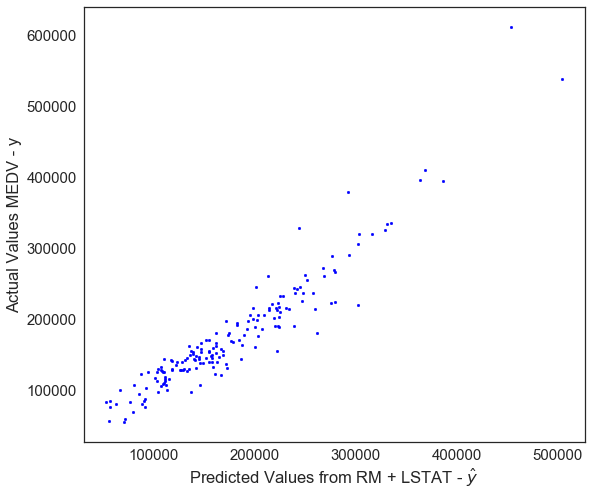

R^2 of the prediction:  0.8921
Mean Square Error: 694379572.11


In [66]:
lm = linear_model.LinearRegression()

X = X_test[snist]
y = y_test 

model = lm.fit(X, y)

predictions  =  model.predict(X)
score        =  model.score(X, y)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='b', marker='.', zorder=10)
plt.xlabel("Predicted Values from RM + LSTAT - $\hat{y}$")
plt.ylabel("Actual Values MEDV - y")
plt.show()

mse = mean_squared_error(y, model.predict(X))
print("R^2 of the prediction:  %.4f" % score)
print("Mean Square Error: %.2f" % mse)

In [67]:
features = X_test.columns
lasso = linear_model.LassoLarsCV(max_iter = 10000)

Xtest = X_test[snist].fillna(0.).values
ytest = y_test.values
lasso.fit(Xtest, np.log(ytest))

ypred = np.exp(lasso.predict(Xtest))
error(ytest, ypred)

0.12106863627386306

In [68]:
# sns.set(style="white", palette="muted", color_codes=False)
# f = pd.melt(X_train, value_vars=quantitative_features)
# g = sns.FacetGrid(f, col="variable", col_wrap=2, aspect=2, sharex=False, sharey=False)
# g = g.map(sns.distplot, "value")

In [69]:
list(quantitative_features)

['lotfrontage',
 'lotarea',
 'yearbuilt',
 'yearremodadd',
 'masvnrarea',
 'totalbsmtsf',
 '1stflrsf',
 '2ndflrsf',
 'grlivarea',
 'totrmsabvgrd',
 'fireplaces',
 'garageyrblt',
 'garagecars',
 'garagearea',
 'wooddecksf',
 'openporchsf']

In [70]:
for i in quantitative_features:
    try:
        log_transform(i)
    except:
        print(i)

lotfrontage
lotarea
yearbuilt
yearremodadd
masvnrarea
totalbsmtsf
1stflrsf
2ndflrsf
grlivarea
totrmsabvgrd
fireplaces
garageyrblt
garagecars
garagearea
wooddecksf
openporchsf


In [71]:
quantitative.saleprice

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: saleprice, Length: 1459, dtype: int64

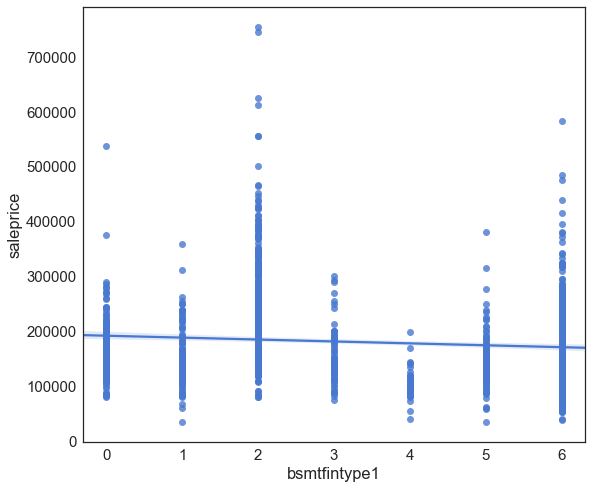

In [73]:
plt.figure(figsize=(8,8))
# sns.regplot(quantitative.saleprice, qualitativele.bsmtqual)
sns.regplot(qualitativele.bsmtfintype1, quantitative.saleprice)

In [74]:
qualitative['saleprice'] = quantitative.saleprice

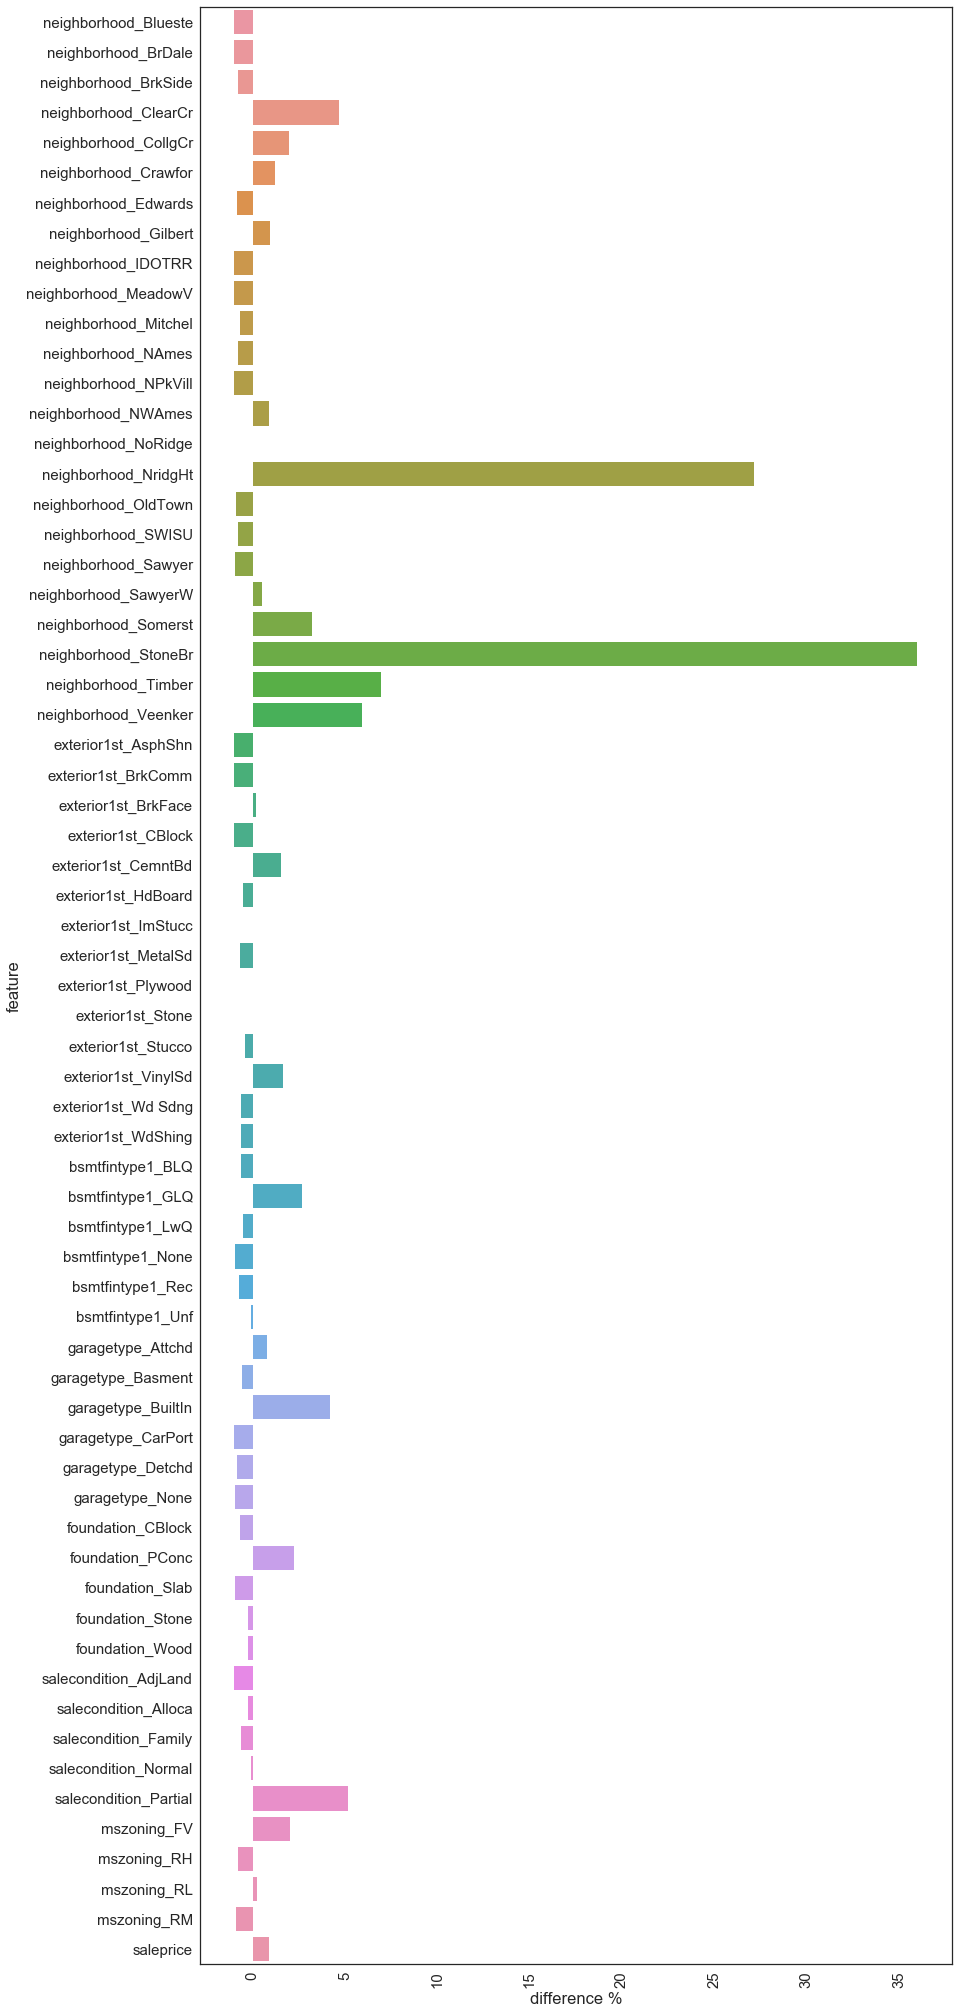

In [75]:

features = qualitative.columns

standard = qualitative[qualitative['saleprice'] < 180000]
pricey = qualitative[qualitative['saleprice'] >= 180000]

diff = pd.DataFrame()
diff['feature'] = features
diff['difference %'] = [(pricey[i].mean() - standard[i].mean())/(standard[i].mean()) for i in features]

plt.figure(figsize = (12,36))
x = plt.xticks(rotation = 90)
sns.barplot(data = diff, x ='difference %', y = 'feature')